Esse notebook tem como objetivo praticar a criação de um autoencoder usando Tensorflow

In [1]:
# importar as libs utilizadas.
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np

Carregar o data set de imagens.

In [2]:
(train_data, _), (test_data, _) = keras.datasets.mnist.load_data()

train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

print (train_data.shape)
print (test_data.shape)


(60000, 28, 28)
(10000, 28, 28)


Agora vamos definir o autoencoder

In [3]:
dimensoes_depois_de_aplainar_imagem = 28* 28
class Autoencoder(keras.Model):
    def __init__(self, dimensoes_espaco_latente):
        super(Autoencoder, self).__init__()
        self.dimensoes_espaco_latente = dimensoes_espaco_latente
        self.encoder = keras.Sequential(layers=[
            keras.layers.Flatten(),
            keras.layers.Dense(dimensoes_espaco_latente, activation="relu")
        ], name="encoder")
        self.decoder = keras.Sequential(layers=[
            keras.layers.Dense(dimensoes_depois_de_aplainar_imagem, activation="sigmoid"),
            keras.layers.Reshape((28,28))
        ], name="decoder")
        
    def call(self, x):
        espaco_latente = self.encoder(x)
        saida = self.decoder(espaco_latente)
        return saida
    

In [4]:
dimensoes_espaco_latente = 64
autoencoder = Autoencoder(dimensoes_espaco_latente)
autoencoder.compile(optimizer="adam", loss=keras.losses.MeanSquaredError())
autoencoder.fit(train_data, train_data, epochs=10, shuffle=True, validation_data=(test_data, test_data))

2022-02-13 21:49:52.896367: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-13 21:49:52.896421: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (earth): /proc/driver/nvidia/version does not exist
2022-02-13 21:49:52.897188: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0093
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0070 - val_loss: 0.0054
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.004

In [5]:
imagens_codificadas = autoencoder.encoder(test_data).numpy()
imagens_decodificadas = autoencoder.decoder(imagens_codificadas).numpy()

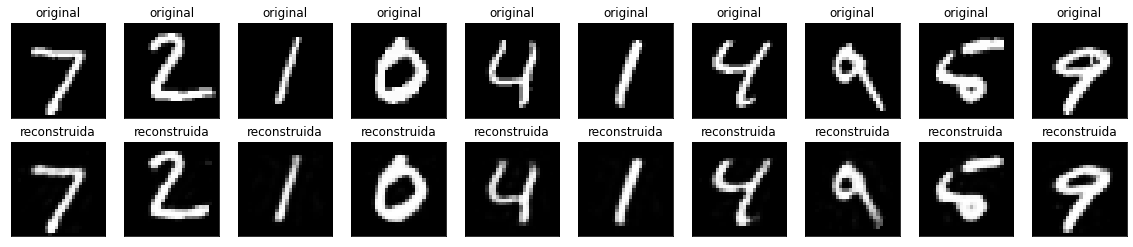

In [6]:
import matplotlib.pyplot as plt


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imagens_decodificadas[i])
    plt.title("reconstruida")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


### Alterando as imagens...

Agora que temos um autoencoder que consegue reconstruida as imagens utilizando o vetor das imagens codificadas, vamos ver se conseguimos um autoencoder que consigar remover ruidos colocados nas imagens.

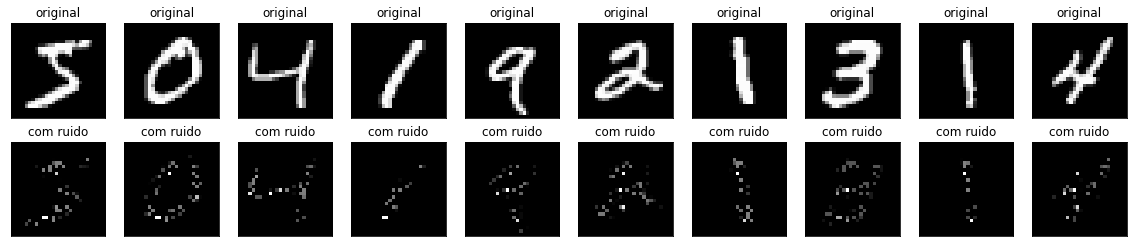

In [16]:
lam = 0.3
train_data2 = train_data * np.random.poisson(lam, size=train_data.shape[1:])
test_data2 = test_data * np.random.poisson(lam, size=train_data.shape[1:])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_data[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_data2[i])
    plt.title("com ruido")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()




In [11]:
dimensoes_espaco_latente = 64
autoencoder2 = Autoencoder(dimensoes_espaco_latente)
autoencoder2.compile(optimizer="adam", loss=keras.losses.MeanSquaredError())
autoencoder2.fit(train_data2, train_data, epochs=20, shuffle=True, validation_data=(test_data2, test_data))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - val_loss: 0.0283
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0080 - val_loss: 0.0339
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0061 - val_loss: 0.0361
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0056 - val_loss: 0.0369
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0053 - val_loss: 0.0384
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0052 - val_loss: 0.0392
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0051 - val_loss: 0.0399
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0050 - val_loss: 0.0400
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0049 - val_loss: 0.0407
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.004

In [12]:
imagens_codificadas2 = autoencoder2.encoder(test_data2).numpy()
imagens_decodificadas2 = autoencoder2.decoder(imagens_codificadas2).numpy()

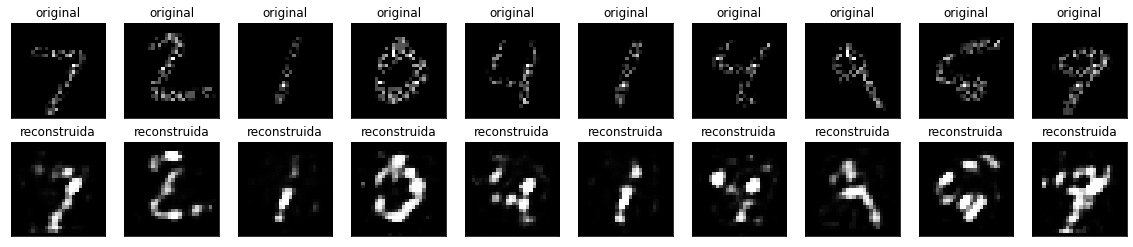

In [13]:


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data2[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(imagens_decodificadas2[i])
    plt.title("reconstruida")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
